<table class="table table-bordered">
    <tr>
        <th style="text-align:center;"><h1>Supervised Machine Learning</h1><h2>Lab 1 - Introduction </h2></th>
    </tr>
</table>

In [2]:
# Import the requried packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, tree, svm, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

### 1.Classification

We will be using the bank marketing campaign data for classification task. The dataset (`bank.csv`) gives you information about a marketing campaign done by a financial institution. After analyze the data, you can find ways to look for future strategies in order to improve future marketing campaigns for the bank. 

Detailed information (i.e. column description) is provided below.

 * **age :**  age in years
 * **job :**  type of job
 * **marital :**  marital status 
 * **education :**  education background 
 * **default :**  has credit in default? 
 * **balance :**  Balance of the individual
 * **housing :**  has housing loan? 
 * **loan :**  has personal loan? 
 * **contact :**  contact communication type 
 * **day :**  last contact day of the week 
 * **month :**  last contact month of year 
 * **duration :**  last contact duration, in seconds 
 * **campaign :**  number of contacts performed during this campaign and for this client
 * **pdays :**  number of days that passed by after the client was last contacted from a previous campaign 
 * **previous :**  number of contacts performed before this campaign and for this client
 * **poutcome :**  outcome of the previous marketing campaign 
 * <font color='red'> **deposit :** has the client subscribed a term deposit? This is the TARGET variable </font> 

*Data Source: Kaggle*

In [3]:
# Loading the data
bank = pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
# Encode the categorical data into numbers
bank_cat = bank.select_dtypes(['object']).copy()
for col in bank_cat:
    print(col, ':')
    codes, uniques = pd.factorize(bank_cat[col], sort=True)
    bank[col]=codes
    print(uniques)

job :
Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object')
marital :
Index(['divorced', 'married', 'single'], dtype='object')
education :
Index(['primary', 'secondary', 'tertiary', 'unknown'], dtype='object')
default :
Index(['no', 'yes'], dtype='object')
housing :
Index(['no', 'yes'], dtype='object')
loan :
Index(['no', 'yes'], dtype='object')
contact :
Index(['cellular', 'telephone', 'unknown'], dtype='object')
month :
Index(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep'],
      dtype='object')
poutcome :
Index(['failure', 'other', 'success', 'unknown'], dtype='object')
deposit :
Index(['no', 'yes'], dtype='object')


In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [7]:
bank.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [8]:
# Set the "deposit" as target/model output and the rest features as model inputs
y = bank['deposit']
X = bank.drop(['deposit'], axis=1)

In [12]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2 )

In [13]:
#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [14]:
#Logistic Regression Model
lg_clf = linear_model.LogisticRegression()
lg_clf.fit(X_train, y_train)

LogisticRegression()

In [15]:
#training acc
lg_train_acc = lg_clf.score(X_train, y_train)
print('LogisticRegression training accuracy: ', lg_train_acc)

#testing acc
lg_test_acc = lg_clf.score(X_test, y_test)
print('LogisticRegression testing accuracy: ', lg_test_acc)

LogisticRegression training accuracy:  0.795721805353343
LogisticRegression testing accuracy:  0.8007165248544559


In [17]:
#K Nearest Neighbors Model
knn_clf = neighbors.KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
#training acc
knn_train_acc = knn_clf.score(X_train, y_train)
print('KNN training accuracy: ', knn_train_acc)

#testing acc
knn_test_acc = knn_clf.score(X_test, y_test)
print('KNN testing accuracy: ', knn_test_acc)

KNN training accuracy:  0.846119386269459
KNN testing accuracy:  0.77384684281236


In [19]:
#Decision Tree Model
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
#training acc
dt_train_acc = dt_clf.score(X_train, y_train)
print('DecisionTree training accuracy: ', dt_train_acc)

#testing acc
dt_test_acc = dt_clf.score(X_test, y_test)
print('DecisionTree testing accuracy: ', dt_test_acc)

DecisionTree training accuracy:  1.0
DecisionTree testing accuracy:  0.7599641737572772


In [21]:
#Support Vector Machine Model
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [22]:
#training acc
svm_train_acc = svm_clf.score(X_train, y_train)
print('SVM training accuracy: ', svm_train_acc)

#testing acc
svm_test_acc = svm_clf.score(X_test, y_test)
print('SVM testing accuracy: ', svm_test_acc)

SVM training accuracy:  0.8425355582932019
SVM testing accuracy:  0.8204209583519928


In [23]:
#Random Forest Model
rf_clf = ensemble.RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
#training acc
rf_train_acc = rf_clf.score(X_train, y_train)
print('RandomForest training accuracy: ', rf_train_acc)

#testing acc
rf_test_acc = rf_clf.score(X_test, y_test)
print('RandomForest testing accuracy: ', rf_test_acc)

RandomForest training accuracy:  1.0
RandomForest testing accuracy:  0.8441558441558441


<AxesSubplot:title={'center':'Train & Test Accuracy for different models'}>

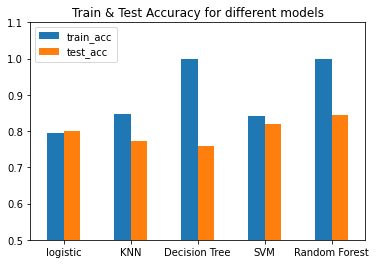

In [25]:
# Comparison
train_acc = [lg_train_acc, knn_train_acc, dt_train_acc, svm_train_acc, rf_train_acc]
test_acc =[lg_test_acc, knn_test_acc, dt_test_acc, svm_test_acc, rf_test_acc]
label =['logistic', 'KNN', 'Decision Tree', 'SVM', 'Random Forest']

df_acc = pd.DataFrame({'train_acc': train_acc,
                   'test_acc': test_acc}, index=label)
df_acc.plot.bar(rot=0, ylim=[0.5, 1.1], title ='Train & Test Accuracy for different models')


In [26]:
# Use the best model to make prediction on test data (return by the probability of No & Yes)
rf_clf.predict_proba(X_test)

array([[0.93, 0.07],
       [0.61, 0.39],
       [0.43, 0.57],
       ...,
       [0.13, 0.87],
       [0.98, 0.02],
       [0.95, 0.05]])

In [27]:
# Use the best model to make prediction on test data (return by 0 (No) or 1 (Yes))
y_pred = rf_clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [23]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[977, 210],
       [149, 897]], dtype=int64)

In [24]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1187
           1       0.81      0.86      0.83      1046

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



In [28]:
# Save the best model
import joblib
joblib.dump(rf_clf, "best_clf.pkl")

['best_clf.pkl']

In [29]:
# Add in prediction into original bank dataset
bank['pred'] = -1
bank.pred[X_train.index] = rf_clf.predict(X_train)
bank.pred[X_test.index] = rf_clf.predict(X_test)
bank.to_csv('bank_with_pred.csv')

### 3. Regression

We will be using the supermarket data for regression task. The data (`supermarket.csv`) have been collected at various supermarket outlets and stores in different cities. The aim is to build a predictive model and predict the sales of each product at a particular outlet. Using this model, supermarket managment team will try to understand the properties of products and outlets which play a key role in increasing sales.

Detailed information (i.e. column description) is provided below.

* **Item_Weight:** Weight of product
* **Item_Fat_Content:** Whether the product is low fat or not
* **Item_Visibility:** The % of total display area of all products in a store allocated to the particular product
* **Item_Type:** The category to which the product belongs
* **Item_MRP:** Maximum Retail Price (list price) of the product
* **Outlet_Identifier:** Unique store ID
* **Outlet_Establishment_Year:** The year in which store was established
* **Outlet_Size:** The size of the store in terms of ground area covered
* **Outlet_Location_Type:** The type of city in which the store is located
* **Outlet_Type:** Whether the outlet is just a grocery store or some sort of supermarket
*  <font color='red'> **Item_Outlet_Sales:** Sales of the product in the particular store. This is the TARGET variable. </font>

*Data Source: Kaggle*

In [40]:
# Loading the data
supermarket = pd.read_csv('supermarket.csv')
supermarket.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8337 entries, 0 to 8336
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8337 non-null   float64
 1   Item_Fat_Content           8337 non-null   object 
 2   Item_Visibility            8337 non-null   float64
 3   Item_Type                  8337 non-null   object 
 4   Item_MRP                   8337 non-null   float64
 5   Outlet_Identifier          8337 non-null   object 
 6   Outlet_Establishment_Year  8337 non-null   int64  
 7   Outlet_Size                5955 non-null   object 
 8   Outlet_Location_Type       8337 non-null   object 
 9   Outlet_Type                8337 non-null   object 
 10  Item_Outlet_Sales          8337 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 716.6+ KB


In [42]:
# Encode the categorical data into numbers
supermarket_cat = supermarket.select_dtypes(['object']).copy()
for col in supermarket_cat:
    print(col, ':')
    codes, uniques = pd.factorize(supermarket_cat[col], sort=True)
    supermarket[col]=codes
    print(uniques)

Item_Fat_Content :
Index(['Low Fat', 'Regular'], dtype='object')
Item_Type :
Index(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object')
Outlet_Identifier :
Index(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035',
       'OUT045', 'OUT046', 'OUT049'],
      dtype='object')
Outlet_Size :
Index(['High', 'Medium', 'Small'], dtype='object')
Outlet_Location_Type :
Index(['Tier 1', 'Tier 2', 'Tier 3'], dtype='object')
Outlet_Type :
Index(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')


In [43]:
supermarket.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1998,-1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [44]:
supermarket.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000
mean,12.856638,0.353005,0.066358,7.225261,139.161087,4.717884,1997.968094,0.601895,1.103395,1.180641,2059.362844
std,4.250410,0.477933,0.051838,4.211323,61.553351,2.853014,8.309941,1.173815,0.812781,0.779410,1506.099754
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,-1.000000,0.000000,0.000000,33.290000
25%,9.300000,0.000000,0.027028,4.000000,93.046200,2.000000,1987.000000,-1.000000,0.000000,1.000000,810.944400
50%,12.857645,0.000000,0.053939,6.000000,141.215400,5.000000,1999.000000,1.000000,1.000000,1.000000,1747.059200
75%,16.100000,1.000000,0.095299,10.000000,183.695000,7.000000,2004.000000,2.000000,2.000000,1.000000,2998.097400
max,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,6478.234000


In [45]:
# Set the "Sales" as target/model output and the rest features as model inputs
y = supermarket['Item_Outlet_Sales']
X = supermarket.drop(['Item_Outlet_Sales'], axis=1)

In [46]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [47]:
#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [48]:
#Linear Regression Model
lm_reg = linear_model.LinearRegression()
lm_reg.fit(X_train, y_train)

LinearRegression()

In [49]:
#training mean absolute error
lm_train_mae = mean_absolute_error(lm_reg.predict(X_train), y_train)
print('LinearRegression training mean absolute error: ', lm_train_mae)

#testing mean absolute error
y_predict = lm_reg.predict(X_test)
lm_test_mae = lm_train_mae = mean_absolute_error(lm_reg.predict(X_test), y_test)
print('LinearRegression testing mean absolute error: ', lm_test_mae)

LinearRegression training mean absolute error:  835.9531497512953
LinearRegression testing mean absolute error:  813.5881859608404


In [50]:
#K Nearest Neighbors Model
knn_reg =neighbors.KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [51]:
#training mean absolute error
knn_train_mae = mean_absolute_error(knn_reg.predict(X_train), y_train)
print('KNN training mean absolute error: ', knn_train_mae)

#testing mean absolute error
knn_test_mae = mean_absolute_error(knn_reg.predict(X_test), y_test)
print('KNN testing mean absolute error: ', knn_test_mae)

KNN training mean absolute error:  633.9672923376819
KNN testing mean absolute error:  753.7984028057555


In [52]:
#Decision Tree Model
dt_reg = tree.DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
#training mean absolute error
dt_train_mae = mean_absolute_error(dt_reg.predict(X_train), y_train)
print('Decision Tree training mean absolute error: ', dt_train_mae)

#testing mean absolute error
dt_test_mae = mean_absolute_error(dt_reg.predict(X_test), y_test)
print('Decision Tree testing mean absolute error: ', dt_test_mae)

Decision Tree training mean absolute error:  0.0
Decision Tree testing mean absolute error:  980.5130423261392


In [55]:
#Support Vector Machine Model
svm_reg = svm.SVR()
svm_reg.fit(X_train, y_train)

SVR()

In [56]:
#training mean absolute error
svm_train_mae = mean_absolute_error(svm_reg.predict(X_train), y_train)
print('SVM mean absolute error: ', svm_train_mae)

#testing mean absolute error
svm_test_mae = mean_absolute_error(svm_reg.predict(X_test), y_test)
print('SVM testing mean absolute error: ', svm_test_mae)

SVM mean absolute error:  1145.1627261829099
SVM testing mean absolute error:  1062.4851442853235


In [57]:
#Random Forest Model
rf_reg = ensemble.RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
#training mean absolute error
rf_train_mae = mean_absolute_error(rf_reg.predict(X_train), y_train)
print('RandomForest mean absolute error: ', rf_train_mae)

#testing mean absolute error
rf_test_mae = mean_absolute_error(rf_reg.predict(X_test), y_test)
print('RandomForest testing mean absolute error: ', rf_test_mae)

RandomForest mean absolute error:  273.7630499814065
RandomForest testing mean absolute error:  740.37294097482


<AxesSubplot:title={'center':'Train & Test MAE for different models'}>

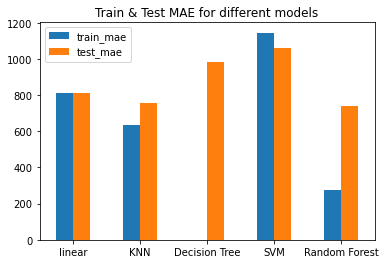

In [59]:
# Comparison
train_mae = [lm_train_mae, knn_train_mae, dt_train_mae, svm_train_mae, rf_train_mae]
test_mae =[lm_test_mae, knn_test_mae, dt_test_mae, svm_test_mae, rf_test_mae]
label =['linear', 'KNN', 'Decision Tree', 'SVM', 'Random Forest']

df_mae = pd.DataFrame({'train_mae': train_mae,
                   'test_mae': test_mae}, index=label)
df_mae.plot.bar(rot=0, title ='Train & Test MAE for different models')


In [62]:
# Use the best model to make prediction on test data
#based on testing performance, Randon Forest is the best performer
y_pred = rf_reg.predict(X_test)
y_pred

array([2962.783368, 2732.929234, 2978.462958, ..., 3523.193886,
        102.43333 , 2149.5353  ])

Text(0, 0.5, 'y_pred')

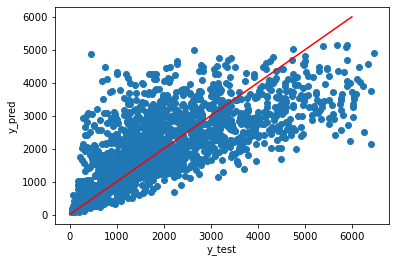

In [63]:
# Visualize y_test & y_pred
plt.scatter(y_test, y_pred)
plt.plot([0, 6000], [0,6000], 'r-')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [48]:
# Save the best model
import joblib
joblib.dump(rf_reg, "best_reg.pkl")

['best_reg.pkl']

In [64]:
# Add in prediction into original supermarket dataset
supermarket['pred'] = -1
supermarket.pred[X_train.index] = rf_reg.predict(X_train)
supermarket.pred[X_test.index] = rf_reg.predict(X_test)
supermarket.to_csv('supermarket_with_pred.csv')

<ipython-input-64-d17e7c813071>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supermarket.pred[X_train.index] = rf_reg.predict(X_train)
<ipython-input-64-d17e7c813071>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supermarket.pred[X_test.index] = rf_reg.predict(X_test)
